# Hand-written Digit Classification Using Inner Products
## Group Formation and General Instructions
You may work individually, but we recommend that you work in pairs or groups of three. Find someone to work with and introduce yourself to them! One of you should copy the Google Document template and share the document with edit permissions with your group member(s): https://docs.google.com/document/d/1V0evwxcKDP67CwdS8aBzAqv2nqpUjKeAaDtdXFvCpCw/template/preview (you must use your umich email address to access this google document). 

The Google Document will include your answers to a couple of questions that will be asked. For each question, pick someone to type up your **group's** response. After completing the response, the group member should sign their name by typing it below the answer. For the next question, have a different group member respond and sign their name in the same way. Keep rotating until all the questions have been answered.

The goal of this group exercise is to formulate your response as a group to the problem. At the end of discussion, **one** student in the group must submit a PDF of the document to gradescope, entering the uniquenames of **all** students in the group. One group submits exactly one PDF, but we expect the PDF from different groups to differ. The deadline for submitting to gradescope will be announced on Canvas.

## Overview
This task illustrates how to use inner products for classifying handwritten digits. We focus on just the two digits "0" and "1" although the principles generalize to all digits.

The angle $\theta$ between two nonzero vectors $\mathbf{x}, \mathbf{y} \in \mathbf{R}^N$ is defined by $$\mathrm{cos}\,\theta = \frac{\langle \mathbf{x}, \mathbf{y} \rangle}{||\mathbf{x}|| \; ||\mathbf{y}||} \implies \theta \in [0, \pi].$$ (Here we focus on real vectors $\mathbf{x}$ and $\mathbf{y}$, but this result generalizes; c.f. slide 1.52 in c-01-matrix.pdf.)

We can use $\theta$ as a measure of "closeness" between two vectors; the closer $\theta$ is to 0, the closer the two vectors are. (Clearly, this is not always true, but if the vectors are assumed to be the same length, then it is true.) The goal of this task is to use $\theta$ to determine whether an input digit is a 0 or a 1.

## Part 0
You do not have to do any coding yet. Just read the code and run the blocks below. You can run code in a jupyter notebook by clicking the "run" button in the toolbar, selecting "Cell->Run Cell" from the menu, or using Ctrl+Enter. 

In [3]:
# Download the packages we need - this will take a while the first time you run it!
using Pkg
Pkg.add("Plots")
Pkg.add("MIRT")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [4]:
# Tell Julia which packages we are using
using Plots
using MIRT: jim 
using LinearAlgebra: norm
using Statistics: mean

In [5]:
# Read the MNIST data file for 0 and 1 digits
# Download from web if needed
file0 = "data0"
file1 = "data1"
if !isfile(file0)
    download("http://cis.jhu.edu/~sachin/digit/data0", file0)
end
if !isfile(file1)
    download("http://cis.jhu.edu/~sachin/digit/data1", file1)
end

nx = 28 # Original image size
ny = 28
nrep = 1000

x0 = Array{UInt8}(undef, (nx,ny,nrep))
read!(file0, x0)

x1 = Array{UInt8}(undef, (nx,ny,nrep))
read!(file1, x1)

iy = 2:ny
x0 = x0[:,iy,:] # Make images non-square to help debug
x1 = x1[:,iy,:]
ny = length(iy)

# Convert images to Float64 to avoid overflow errors
x0 = Array{Float64}(x0)
x1 = Array{Float64}(x1)

display(size(x0))

(28, 27, 1000)

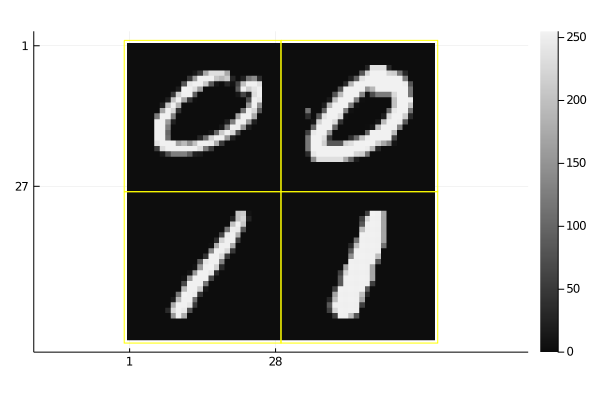

In [6]:
# Look at a couple of the images
# jim stands for "jiffy image" and is part of the MIRT package
jim(cat(x0[:,:,50:51], x1[:,:,601:602], dims = 3))

In [7]:
# Use some data for training, and some for testing
ntrain = 100
ntest = nrep - ntrain
train0 = x0[:,:,1:ntrain] # Training data
train1 = x1[:,:,1:ntrain]
test0 = x0[:,:,(ntrain+1):end] # Testing data
test1 = x1[:,:,(ntrain+1):end];

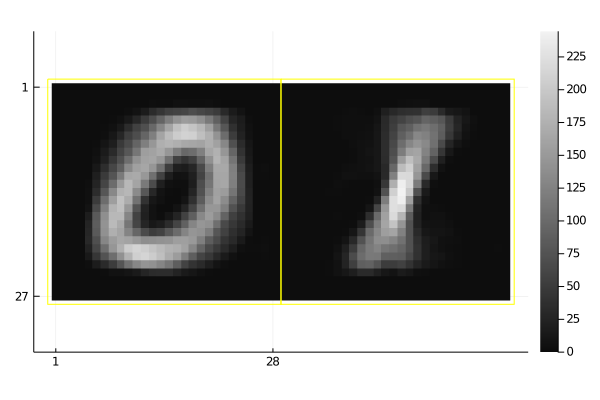

In [8]:
# Look at mean image from each class just to get a sense of things
# Note that we are doing nearest neighbor classification, 
# so we will not use the mean0 and mean1 variables! 
mean0 = mean(train0, dims = 3)
mean1 = mean(train1, dims = 3)

jim(cat(mean0, mean1, dims = 3))

## Part 1
Using the equation given in the overview to define how close two vectors are, classify all the test data and calculate the percentage of correctly classified digits. Classify a test digit as a 0 if the training signal it is "closest" to is a zero. Classify a test digit as a 1 if the training signal it is "closest" to is a one. 

Report your percentages in your Google Document and comment on how well (or poorly) it does.

In [9]:
# TODO: the TODO header means you must enter some code in this block!  

# Let's break down this task into smaller pieces. 
# First, how can we find the angle between two given vectors, 
getangle1(v1, v2) = acos(v2'v1/ (norm(v1)*norm(v2) )) # fill this in 

# let's test this function before moving on  
@show getangle1([1, 0], [0, 1])*180/pi # should return 90 degrees
@show getangle1([1, 1], [1, 1])*180/pi # should return  0 degrees
@show getangle1([0, 1], [1, 1])*180/pi # should return 45 degrees

(getangle1([1, 0], [0, 1]) * 180) / pi = 90.0
(getangle1([1, 1], [1, 1]) * 180) / pi = 1.2074182697257333e-6
(getangle1([0, 1], [1, 1]) * 180) / pi = 45.00000000000001


45.00000000000001

In [10]:
typeof(one_image)

LoadError: UndefVarError: one_image not defined

In [11]:
# now, let's try this function out with the first test image and the first example "0" image 
# let's define two variables that we can work with 
one_image = x0[:,:,1]
another_image = x0[:,:,2]

getangle1(one_image, another_image)

27×27 Array{Complex{Float64},2}:
 1.5708+0.0im     0.0+0.0im     0.0+0.0im  …     0.0+0.0im     0.0+0.0im
    0.0+0.0im  1.5708+0.0im     0.0+0.0im        0.0+0.0im     0.0+0.0im
    0.0+0.0im     0.0+0.0im  1.5708+0.0im        0.0+0.0im     0.0+0.0im
    0.0+0.0im     0.0+0.0im     0.0+0.0im        0.0+0.0im     0.0+0.0im
    0.0+0.0im     0.0+0.0im     0.0+0.0im        0.0+0.0im     0.0+0.0im
    0.0+0.0im     0.0+0.0im     0.0+0.0im  …     0.0+0.0im     0.0+0.0im
    0.0+0.0im     0.0+0.0im     0.0+0.0im        0.0+0.0im     0.0+0.0im
    0.0+0.0im     0.0+0.0im     0.0+0.0im        0.0+0.0im     0.0+0.0im
    0.0+0.0im     0.0+0.0im     0.0+0.0im        0.0+0.0im     0.0+0.0im
    0.0+0.0im     0.0+0.0im     0.0+0.0im        0.0+0.0im     0.0+0.0im
    0.0+0.0im     0.0+0.0im     0.0+0.0im  …     0.0+0.0im     0.0+0.0im
    0.0+0.0im     0.0+0.0im     0.0+0.0im        0.0+0.0im     0.0+0.0im
    0.0+0.0im     0.0+0.0im     0.0+0.0im        0.0+0.0im     0.0+0.0im
       ⋮          

In [12]:
# TODO 

#images input as matrices, not vectors


# now, let's fix it 
getangle1(vec(one_image), vec(another_image)) # this line is still incorrect - we'll talk about how to fix it

0.5154614877250011

In [13]:
# TODO 

# Now that we can find one angle, we need to write a classify function that 
# classifies a single test vector 

"""
class = classify(test, train0, train1)

Binary classification based on the minumum angle between the test vector and each vector in the training data. 

In: 
- test     :    Vector of length M. M is the number of features. 
- train0   :    M x N0 matrix. N0 is the number of training samples of class 0.
- train1   :    M x N1 matrix. N1 is the number of training samples of class 1. 
- 

Out:
- The class (0 or 1) for every vector in test. 
"""
function classify(test, train0, train1)
    
    # perhaps the most intuitive way to write it: 
    θ0min = pi;
    for n = 1: size(train0, 2) 
        θ0 = getangle1(test, train0[:, n]) # fill this in: for each train0 image, calculate the angle with the test image
        if θ0 < θ0min
            θ0min = θ0
        end 
    end
    
    θ1min = pi;
    for n = 1: size(train1, 2)
        θ1 = getangle1(test, train1[:, n]) # fill this in: for each train0 image, calculate the angle with the test image
        if θ1 < θ1min
            θ1min = θ1
        end 
    end
    
    # we will talk about a more "julia" way to write this function! 
    
    return θ0min < θ1min ? 0 : 1
end


classify

In [17]:
# TODO  

# now, call the classify function on our data 
train0r = reshape(train0, :, ntrain) # reshape the data so that each column is a vector with the data form one image 
train1r = reshape(train1, :, ntrain)
test0r = reshape(test0, :, ntest)
test1r = reshape(test1, :, ntest)

correct0 = [classify(test0r[:,n], train0r, train1r) == 0 for n = 1:ntest]
correct1 = [classify(test1r[:,n], train0r, train1r) == 1 for n = 1:ntest]

display("Fraction 0 correct = $(sum(correct0) / ntest)")
display("Fraction 1 correct = $(sum(correct1) / ntest)")


"Fraction 0 correct = 0.9988888888888889"

"Fraction 1 correct = 0.9988888888888889"

In [27]:
899/900

0.9988888888888889

## Part 2
Find the digits that were misclassified. In your Google Document, display a few of these digits and include the indexes. Comment on why you think these digits were misclassified.

In [19]:
# Find the indexes of the misclassified digits
incorrect0 = findall(correct0 .== 0) # alternatively: findall(x -> !x, correct0)
incorrect1 = findall(correct1 .== 0) # alternatively: findall(x -> !x, correct1)
@show(incorrect0, incorrect1);

incorrect0 = [43]
incorrect1 = [673]


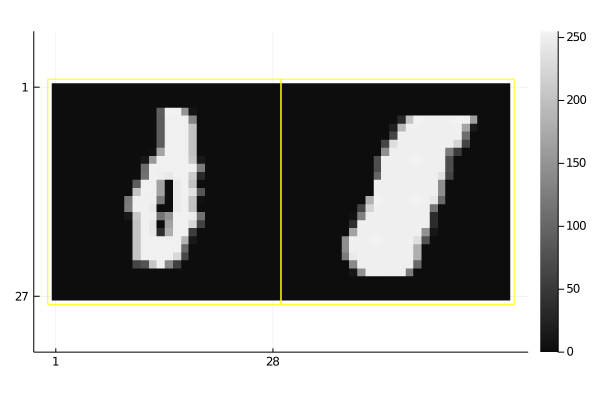

In [22]:
# TODO  

# Display the incorrectly classified digits
# look at the previous example of how we called the jim function and use that to show
# a plot of test0[:,:,incorrect0[1]] and test1[:,:,incorrect1[1]]
jim(cat(test0[:, :, incorrect0[1]], test1[:, :, incorrect1[1]], dims = 3 )) #copied from the discussion

## Part 3
Similar to task 1, classify all the test data  and calculate the percentage of correctly classified digits. 
However, instead of the equation given in the overview, use the 
vector 2-norm to define how close two vectors are, e.g., 
$ \text{dist}(x, y) = \|x-y\|_2 $. 
As before, classify a test digit as a 0 if the training signal it is "closest" to is a zero and 
    classify a test digit as a 1 if the training signal it is "closest" to is a one. 

Report your percentages in your Google Document and comment on how well (or poorly) it does. 

Hint: a good starting place may be copying all your code from task 1 then thinking about what (small) part of it you need to change. 

In [28]:
# TODO  

# Classify all the test data and calculate the percentage of correctly classified digits

"""
class = classify_2norm(test, train0, train1)

Binary classification based on the minumum 2-norm between the test vector and each vector in the training data. 

In: 
- test     :    Vector of length M. M is the number of features. 
- train0   :    M x N0 matrix. N0 is the number of training samples of class 0.
- train1   :    M x N1 matrix. N1 is the number of training samples of class 1. 
- 

Out:
- The class (0 or 1) for every vector in test. 
"""
function classify_2norm(test, train0, train1)
     # perhaps the most intuitive way to write it: 
    d0min = norm(test-train0[:,1]);
    for n = 2: size(train0, 2) 
        d0 = norm(test-train0[:,n]);
        if d0 < d0min
            d0min = d0
        end 
    end
    
    d1min = norm(test-train1[:,1]);;
    for n = 2: size(train1, 2)
        d1 = norm(test-train1[:,n]);
        if d1 < d1min
            d1min = d1
        end 
    end
    
    # we will talk about a more "julia" way to write this function! 
    
    return d0min < d1min ? 0 : 1
end

# TODO - use the classify_2norm function to classify images 

classify_2norm

In [30]:
# Find the indexes of the misclassified digits
# (you do not need to include this in your report)
incorrect0 = [0]
incorrect1 = [0]
incorrect0 = findall(x -> !x, correct0)
incorrect1 = findall(x -> !x, correct1)
@show(incorrect0, incorrect1);

incorrect0 = [43]
incorrect1 = [673]


## Optional Parts

You do not need to do these parts - they are optional! 

- Extend this notebook to handle 3 digits (or all 10).
- These images are $28 \times 27$ and it is hard to visualize vectors in $\mathbf{R}^{756}$. Think about how to make a 2D picture that shows the test data as a colored scatter plot with a dividing line separating (hopefully) the two classes.